# TP n° 3

# Deux méthodes de résolution numérique d'un problème de Cauchy
$\newcommand{\ds}{\displaystyle}$
$\newcommand{\R}{{\mathbb R}}$

Nous allons programmer deux méthodes pour construire une solution approchée du problème de Cauchy 
\begin{equation}
\left\lbrace
\begin{aligned}
&y'= f(t, y),\\
&y(0) = y_0.
\end{aligned}
\right.
\tag{1}\label{1}
\end{equation}

On va calculer des valeurs approchées de la solutions aux instants $t^n =n\Delta t$, où $\Delta t>0$ est un __pas de temps__ choisi arbitrairement. Pour cela on part de la formule, valable pour toute fonction $y$ de classe $C^1$,

\begin{equation}
y(t^{n+1})-y(t^n)=\int_{t^n}^{t^{n+1}} y'(s) ds
\tag{2}\label{2}
\end{equation}

Ainsi, la fonction $y$, supposée $C^1$, est la solution du problème de Cauchy $\eqref{1}$ si et seulement si, pour toute suite $(t^n)$, 

\begin{equation}
\left\{
\begin{array}{l}
y(t^{n+1})= y(t^n) +\ds\int_{t^n}^{t^{n+1}} f(s,y(s)) ds,\\
y(t^0) = y_0.
\end{array}
\right .
\tag{3}\label{3}
\end{equation}


## 1. Méthode d'Euler


La méthode d'Euler est basée sur la formule $\eqref{3}$ et consiste à remplacer l'intégrale 
par l'approximation:

\begin{equation}
\int_{t^n}^{t^{n+1}} f(s,y(s)) ds\sim (t^{n+1}-t^n)f(t_n,y(t^n))=\Delta t f(t_n,y(t^n)).
\tag{4}\label{4}
\end{equation}



#### QUESTION 1 

A quoi correspond graphiquement cette approximation de $\ds\int_a^b g(s) ds$?

Cela correspond a l'aire d'un rectangle de hauteur f(tn,yt) et de largeur deltat

#### QUESTION 2

Programmer la méthode d'Euler afin de calculer la solution approchée d'un problème de Cauchy scalaire ( i.e. où l'inconnue est à valeurs dans $\R$) générique. On écrira une fonction euler(f, y_0, T, Delta_t) qui renvoie deux tableaux : t, constitué des instants 0, Delta_t, 2Delta_t,..., T et y, constitué des valeurs de la solution approchée en ces instants.

Tester votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents pas de temps) sur le même graphique.

In [1]:
# Votre réponse
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.ndarray??

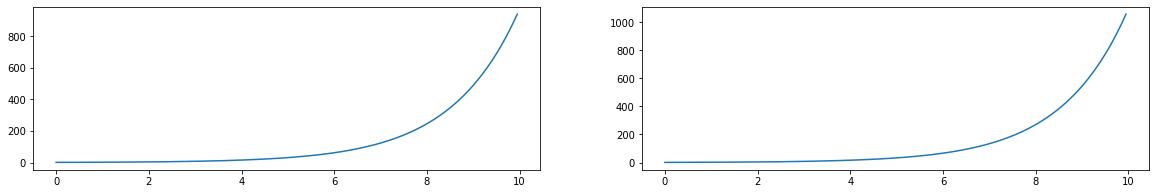

In [3]:


def euler(f, y_0, T, Delta_t):
    """
    schéma d'Euler explicite pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    t = np.arange(0,T,Delta_t)
    N = np.array(range(0,len(t)-1))
    y = np.zeros(len(t))
    y[0]= y_0;
    for s in N:
        y[s+1]= y[s] + Delta_t * f(t[s],y[s])
    return t,y

T = 10
Delta_t = 0.05
y_0 = 1
rr = 0.7
K =10
def m(t,y):
    return rr*y

def f (t,y):
    return rr * y * (1-y/K)

fig,ax = plt.subplots(1,2,figsize = (20,3))
res = euler(m,y_0,T,Delta_t)
t = res[0]
ax[0].plot(t,res[1])
ax[1].plot(t,y_0 * np.exp(rr * t))

### Erreur du schéma


Le schéma d'Euler permet de trouver des valeurs approchées $y^n$ aux instants $t^n$ de la valeur $y(t^n)$ de la solution du problème de Cauchy (1). L'erreur du schéma à l'instant $t^n$ est la quantité

\begin{equation}
e_n = \vert y^n -y(t^n)\vert,
\end{equation}

et l'erreur globale du schéma d'Euler est le maximum sur tous les instants de l'erreur locale :

\begin{equation}
e=\max_n e_n.
\end{equation}

Ce que l'on espère, c'est que cette erreur $e$ tende vers 0 quand le pas $\Delta t$ tend vers 0. On dit que le schéma est _convergent_ lorsque c'est le cas.

#### QUESTION 3

Pour l'équation de Malthus ci-dessus, calculer les erreurs globales du schéma d'Euler pour différentes valeurs de $\Delta t$. Ce schéma vous semble-t-il convergent ?

In [4]:
def calcErreurGlobale(solAp,solEx):
    if (len(solAp) != len(solEx)):
        print("The two solution are not the same size")
        return False
    i = 0
    maxEcart = 0
    for yn in solAp:
        maxEcart = max(abs(yn - solEx[i]),maxEcart)
        i+=1
    return maxEcart

In [5]:
calcErreurGlobale(res[1],K /(1+(K/y_0 - 1) * np.exp(-rr * t)))

930.0880753804942

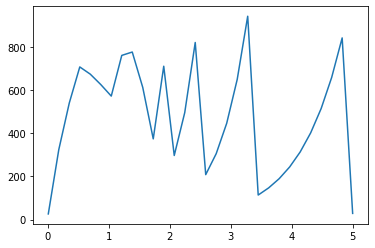

In [6]:
erreurs = []
deltaLinsapce = np.linspace(5,0.01,30) 
for Delta_t in deltaLinsapce:
    res = euler(m,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],y_0*np.exp(rr * res[0])))
    
plt.plot(deltaLinsapce,erreurs)

#### QUESTION 4
Pour un schéma convergent, on souhaite que la convergence vers la solution exacte soit le plus rapide possible. On dit qu'un schéma est d'ordre $p$ lorsque $e=O((\Delta t)^p)$ quand $\Delta t\to 0$ (pour les fonctions $f$ régulières).

Estimer l'ordre de convergence apparent du schéma d'Euler pour l'équation de Malthus (on pourra tracer
$\log e/\log \Delta t$).

In [7]:
plt.plot??

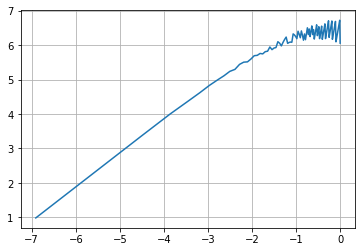

In [8]:
erreurs = []
deltaLinspace = np.linspace(1,0.001,100) 
for Delta_t in deltaLinspace:
    res = euler(m,y_0,T,Delta_t)
    erreurs.append(calcErreurGlobale(res[1],y_0*np.exp(rr * res[0])))
plt.grid()
plt.plot(np.log(deltaLinspace),np.log(erreurs))

p=1 (fonction ~ affine de pente 2 en log, donc cubique en normal.)

#### QUESTION 5
 
Appliquer ce schéma à la résolution numérique du problème de Verhulst ($r=2$, $K=1$ par exemple,  comme dans le TP1).
On prend $y_0=0.1$ et on veut résoudre le problème entre $t=0$ et $t=T_f=20$. Prenez des valeurs de Delta_t entre 1 et 0.2. Que remarquez-vous?

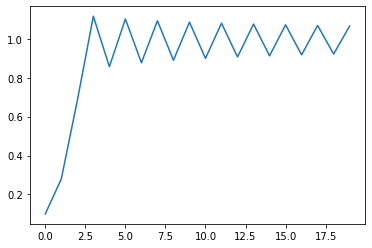

In [9]:
rr=  2
K = 1
res = euler(f,0.1,20,1)
plt.plot(res[0],res[1])

ça se rapproche de la suite récurrente.

#### QUESTION 6

On prend maintenant quelques pas de temps inférieurs à 0.1. Tracer des solutions approchées ainsi que la solution exacte dans une fenêtre graphique. 

Vérifier graphiquement que la solution approchée converge bien vers la solution exacte, par exemple en divisant le pas de temps par 2 plusieurs fois. On se focalisera sur l'intervalle [0,2].

voir ci dessus

#### QUESTION 7

Calculer l'erreur globale apparente du schéma d'Euler pour l'équation de Verhulst. Estimer l'ordre de convergence apparent du schéma d'Euler pour l'équation de Verhulst.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


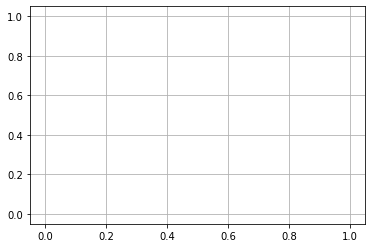

In [10]:
erreurs = []
deltaLinsapce = np.linspace(5,0.01,100) 
for Delta_t in deltaLinsapce:
    res = euler(f,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],K /(1+(K/y_0 - 1) * np.exp(-rr * res[0]))))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

p=1 (fonction ~ linéaire de pente 1 en log, donc affine en normal.)

## 2. Schéma du point du milieu :

On veut toujours résoudre le problème de Cauchy (1), en utilisant la formulation intégrale (3). Cette fois on utilise l'approximation

\begin{equation}
\int_a^b g(s)ds
\sim
(b-a)g(\frac{a+b}{2})
\tag{6}\label{6}
\end{equation}

Comme on ne connait évidemment pas la valeur de $y$ à l'instant $\ds t^{n+1/2} := \frac{t^n+t^{n+1}}{2}$, on est conduit au schéma dit _du point milieu_ suivant:

\begin{equation}
\left\{
\begin{array}{lcl}
    t^{n+1/2} &=& t^n + \frac{\Delta t}{2},\\
    y^{n+1/2} &=& y^n + \frac{\Delta t}{2} f(t^n,y^n),\\
    y^{n+1} &=& y^n + \Delta t \ f(t^{n+1/2},y^{n+1/2})
\end{array}
\right .
\tag{7}\label{7}
\end{equation}

#### QUESTION 8

A quoi correspond graphiquement cette approximation de $\ds\int_a^b g(s) ds$?

même chose, mais la avec une fonction affine a la place du haut du rectangle.

#### QUESTION 9

Programmer la méthode du point milieu afin de calculer la solution approchée d'un problème de Cauchy scalaire ( i.e. où l'inconnue est à valeurs dans  ℝ ) générique. On écrira une fonction milieu(f, y_0, T, Delta_t) qui renvoie un tableau constitué des valeurs de la solution approchée aux instants 0, Delta_t, 2Delta_t,..., T.

Tester votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents pas de temps) sur le même graphique.

In [11]:
# votre réponse

def milieu(f, y_0, T, Delta_t):
    """
    schéma du point milieu pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    t = np.arange(0,T,Delta_t)
    N = np.array(range(0,len(t)-1))
    y = np.zeros(len(t))
    y[0]= y_0;
    for s in N:
        y[s+1]= y[s] + Delta_t * f(t[s]+Delta_t*0.5, y[s]+Delta_t*0.5*f(t[s],y[s]))
    return t,y


#### QUESTION 10

Pour l'équation de Malthus ci-dessus, calculer les erreurs globales du schéma du point milieu pour différentes valeurs de $\Delta t$. Ce schéma vous semble-t-il convergent ?

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


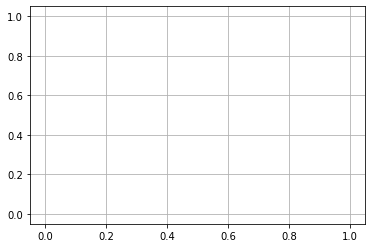

In [12]:
erreurs = []
deltaLinsapce = np.linspace(5,0.01,100) 
for Delta_t in deltaLinsapce:
    res = milieu(f,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],K /(1+(K/y_0 - 1) * np.exp(-rr * res[0]))))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

oui

#### QUESTION 11

Estimer l'ordre de convergence du schéma du point milieu pour l'équation de Malthus.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


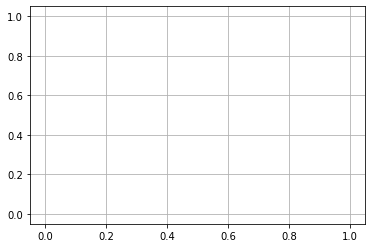

In [13]:
erreurs = []
deltaLinsapce = np.linspace(5,0.01,100) 
for Delta_t in deltaLinsapce:
    res = milieu(f,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],K /(1+(K/y_0 - 1) * np.exp(-rr * res[0]))))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

p = 2 : quadratique

#### QUESTION 12

Reprendre les questions 9, 10 et 11 pour l'équation de Verhulst.

non
ça donnera pareil.
C'est la même méthode avec 2 fois plus de pas.



#### QUESTION 13

On peut prouver qu'en fait, l'ordre d'un schéma numérique pour résoudre des problèmes de Cauchy (1) ne dépend pas de la fonction $f$ (pourvu qu'elle soit assez régulière). Parmi les deux schémas qu'on a étudié, lequel utiliserez vous à l'avenir?

milieu

In [46]:
# votre réponse

def rKut2(f, y_0, T, Delta_t):
    """
    schéma du point milieu pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    t = np.arange(0,T,Delta_t)
    N = np.array(range(0,len(t)-1))
    y = np.zeros(len(t))
    y[0]= y_0
    ft0 = y_0
    for s in N:
        ft1 = y[s] + Delta_t * f(t[s],y[s]) 
        
        y[s+1]= ft1 + 0.5*Delta_t*(ft1-ft0)
        ft0 = ft1
    return t,y


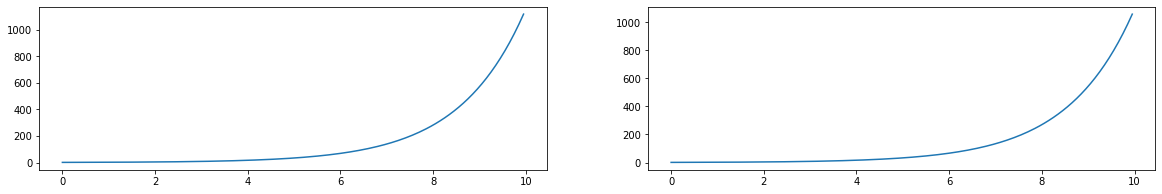

In [47]:
fig,ax = plt.subplots(1,2,figsize = (20,3))
T = 10
Delta_t = 0.05
y_0 = 1
rr = 0.7
K =10
def m(t,y):
    return rr*y

res = rKut2(m,y_0,T,Delta_t)
t = res[0]

ax[0].plot(t,res[1])
ax[1].plot(t,y_0 * np.exp(rr * t))

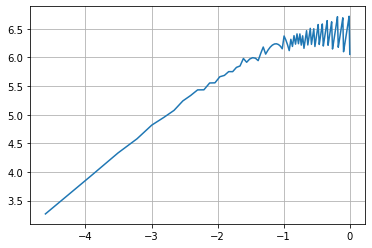

In [59]:
erreurs = []
deltaLinsapce = np.linspace(1,0.01,100)
for Delta_t in deltaLinsapce:
    res = euler(m,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],y_0*np.exp(rr * res[0])))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

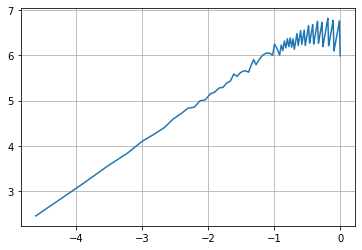

In [56]:
erreurs = []
deltaLinsapce = np.linspace(1,0.01,100)
for Delta_t in deltaLinsapce:
    res = trapeze(m,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],y_0*np.exp(rr * res[0])))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

In [84]:
squared = lambda x: x**2
squared(2)

4

In [155]:
def resEquation(f,y_t,t,dt,prec):
    """
    resout l'équation y_t+1 = y_t + f(t+dt,y_t+1)
    et retourne y_t+1
    """
    
    borneMin = y_t + dt *f(t,y_t) - 2
    borneMax = borneMin + 4
    bornesMins = [borneMin]
    bornesMaxs = [borneMax]
    distance  = lambda : borneMax-borneMin
    moy = lambda : (borneMax+borneMin)*0.5
    while (distance() > prec):
        if (f(t+dt,moy()) - moy() < 0 ):
            borneMax = moy()
            bornesMaxs.append(borneMax)
        else:
            borneMin = moy()
            bornesMins.append(borneMin)
            
    
    plt.plot(range(len(bornesMins)),bornesMins, label = "bornes mins")
    plt.plot(range(len(bornesMaxs)),bornesMaxs, label = "bornes maxs")
    plt.legend()
    print("bornes Mins : ",bornesMins)
    print("bornes Maxs : ",bornesMaxs)
    
    return moy()
            
        

bornes Mins :  [-0.95, 1.0499999999999998, 2.05, 2.55, 2.8, 2.925, 2.9875, 3.01875, 3.034375, 3.0421875, 3.04609375, 3.048046875, 3.0490234375, 3.04951171875, 3.049755859375, 3.0498779296875, 3.04993896484375]
bornes Maxs :  [3.05]


3.049969482421875

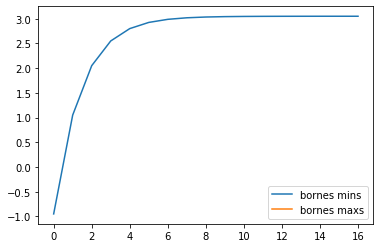

In [156]:
resEquation((lambda t,y: y),1,1,0.05,0.0001)

In [154]:
np.exp(1+0.05)

2.857651118063164

In [149]:
# votre réponse

def impl(f, y_0, T, Delta_t):
    """
    schéma d'euler implicite pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    t = np.arange(0,T,Delta_t)
    N = np.array(range(0,len(t)-1))
    y = np.zeros(len(t))
    y[0]= y_0
    ft0 = y_0
    for s in N:
        y[s+1] = resEquation(f,y[s],t[s],Delta_t,0.01)
        
    return t,y


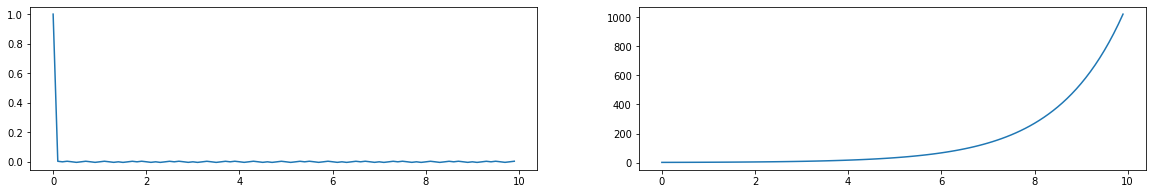

In [150]:
T = 10
Delta_t = 0.1
y_0 = 1
rr = 0.7
K =10
def m(t,y):
    return rr*y

def f (t,y):
    return rr * y * (1-y/K)

fig,ax = plt.subplots(1,2,figsize = (20,3))
res = impl(m,y_0,T,Delta_t)
t = res[0]
ax[0].plot(t,res[1])
ax[1].plot(t,y_0 * np.exp(rr * t))

In [151]:
erreurs = []
deltaLinsapce = np.linspace(0.001,1,10)**1.5
for Delta_t in deltaLinsapce:
    res = impl(m,y_0,T,Delta_t)
    
    erreurs.append(calcErreurGlobale(res[1],y_0*np.exp(rr * res[0])))
    
plt.grid()
plt.plot(np.log(deltaLinsapce),np.log(erreurs))

KeyboardInterrupt: 